In [10]:
import sqlite3

conexion = sqlite3.connect('sample.db')
cursor = conexion.cursor()
print("Conexión OK")
    
consulta = "select * from customers"

cursor.execute(consulta)
resultado = cursor.fetchall()
print(resultado)
cursor.close()


Conexión OK
[(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3), (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5), (3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3), (4, 'Bjørn', 'Hansen', None, 'Ullevålsveien 14', 'Oslo', None, 'Norway', '0171', '+47 22 44 22 22', None, 'bjorn.hansen@yahoo.no', 4), (5, 'František', 'Wichterlová', 'JetBrains s.r.o.', 'Klanova 9/506', 'Prague', None, 'Czech Republic', '14700', '+420 2 4172 5555', '+420 2 4172 5555', 'frantisekw@jetbrains.com', 4), (6, 'Helena', 'Holý', None, 'Rilská 3174/6', 'Prague', None, 'Czech Republic', '14300', '+420 2 4177 0449', None, 'hholy@gmail.com', 

In [25]:
import pandas as pd
import sqlite3


conexion = sqlite3.connect('sample.db')
cursor = conexion.cursor()
print("Conexión OK")

consulta = "SELECT FirstName, PostalCode, City, Country from customers"

    
cursor.execute(consulta)
resultado = cursor.fetchall()

df = pd.DataFrame(resultado, columns=['nombre', 'codigo postal', 'ciudad', 'pais'])
orden = df.sort_values('ciudad', ascending=False)
print(orden)

Conexión OK
       nombre codigo postal               ciudad            pais
32      Ellie       X1A 1N6          Yellowknife          Canada
31      Aaron       R3L 2B9             Winnipeg          Canada
48  Stanisław        00-358               Warsaw          Poland
6      Astrid          1010               Vienne         Austria
14   Jennifer       V6C 1G8            Vancouver          Canada
26    Patrick         85719               Tucson             USA
28     Robert       M6J 1V1              Toronto          Canada
9     Eduardo     01007-010            São Paulo          Brazil
10  Alexandre     01310-200            São Paulo          Brazil
0        Luís     12227-000  São José dos Campos          Brazil
1      Leonie         70174            Stuttgart         Germany
50     Joakim         11230            Stockholm          Sweden
54       Mark          2010               Sidney       Australia
56       Luis          None             Santiago           Chile
27      Julia

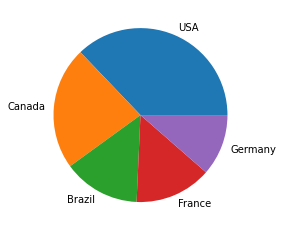

In [34]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conexion = sqlite3.connect('sample.db')
cursor = conexion.cursor()

consulta = "SELECT COUNT(CustomerID) as contador, Country from customers group by country"

cursor.execute(consulta)
resultado = cursor.fetchall()

df = pd.DataFrame(resultado, columns=['numero', 'pais'])
orden = df.sort_values('numero', ascending=False)
dfpais = orden['pais'].head()
dfnumero = orden['numero'].head()
plt.pie(dfnumero, labels = dfpais)
plt.show()

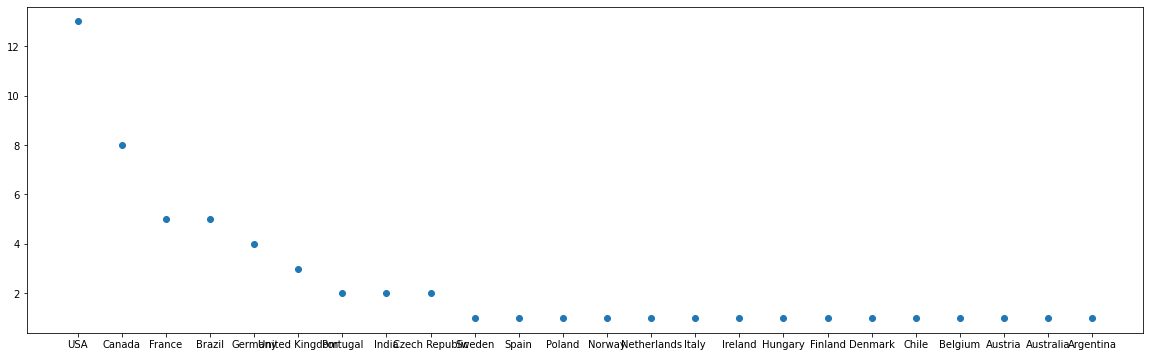

In [52]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conexion = sqlite3.connect('sample.db')
cursor = conexion.cursor()

consulta = "SELECT COUNT(CustomerID) as contador, Country as pais from customers group by country order by contador DESC"
cursor.execute(consulta)
resultado = cursor.fetchall()

df = pd.DataFrame(resultado)
dfplot = pd.DataFrame(resultado, columns=['numero', 'pais'])

fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(x = df[1], y = df[0])

plt.show()